In [2]:
# add sys path to load src
import sys
sys.path.append('../')

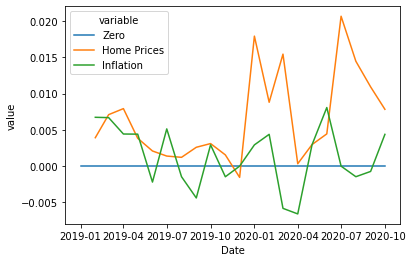

In [28]:
# libraries
import seaborn as sns
import pandas as pd

# import data functions
from src import make_datasets, merge_datasets

real_estate_df = make_datasets.make_real_estate_df()
inflation_df = make_datasets.make_inflation_df()

# load and merge the data
change_df = merge_datasets.merge_realestate_df(real_estate_df[['Date', 'Composite_Benchmark_Change']], inflation_df[['Date', 'Inflation_Change']])

# save the cleaned data
change_df.to_csv('../data/processed/real_estate_change.csv')

# plot dataframe
sns.lineplot(x='Date', y='value', hue='variable', 
             data=pd.melt(change_df.rename(columns={'Composite_Benchmark_Change': 'Home Prices', 'Inflation_Change': 'Inflation'}), ['Date']))

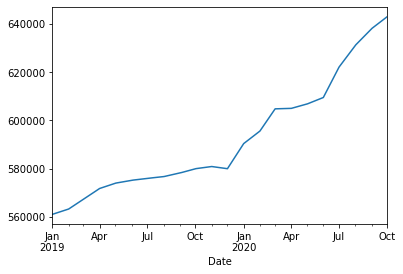

In [34]:
real_estate_df = make_datasets.make_real_estate_df()

real_estate_df = real_estate_df.set_index(['Date']).resample(rule='d').interpolate()

real_estate_df['Composite_Benchmark'].plot()